# Sentiment Analysis of Twitter Posts

<!-- Notebook name goes here -->
<center><b>Notebook: Data Description, Cleaning, Exploratory Data Analysis, and Preprocessing</b></center>
<br>

**by**: Stephen Borja, Justin Ching, Erin Chua, and Zhean Ganituen.

**dataset**: Hussein, S. (2021). Twitter Sentiments Dataset [Dataset]. Mendeley. https://doi.org/10.17632/Z9ZW7NT5H2.1

**motivation**: Every minute, social media users generate a large influx of textual data on live events. Performing sentiment analysis on this data provides a real-time view of public perception, enabling quick insights into the general population’s opinions and reactions.

**goal**: By the end of the project, our goal is to create and compare supervised learning algorithms for sentiment analysis.

### **dataset description**

The Twitter Sentiments Dataset is a dataset that contains nearly 163k tweets from Twitter. The time period of when these were collected is unknown, but it was published to Mendeley Data on May 14, 2021 by Sherif Hussein of Mansoura University.

Tweets were extracted using the Twitter API, but the specifics of how the tweets were selected are unmentioned. The tweets are mostly English with a mix of some Hindi words for code-switching <u>(El-Demerdash., 2021)</u>. All of them seem to be talking about the political state of India. Most tweets mention Narendra Modi, the current Prime Minister of India.

Each tweet was assigned a label using TextBlob's sentiment analysis <u>(El‑Demerdash, Hussein, & Zaki, 2021)</u>, which assigns labels automatically.

Twitter_Data

- **`clean_text`**: The tweet's text
- **`category`**: The tweet's sentiment category

What each row and column represents: `each row represents one tweet.` <br>
Number of observations: `162,980`

---

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Code-switching is the practice of alternating between two languages $L_1$ (the native language) and $L_2$ (the source language) in a conversation. In this context, the code-switching is done to appear more casual since the conversation is done via Twitter (now, X).


## **1. Project Set-up**

We set the global imports for the projects (ensure these are installed via uv and is part of the environment). Furthermore, load the dataset here.


In [1]:
import pandas as pd
import numpy as np
import os
import sys

# Use lib directory
sys.path.append(os.path.abspath("../lib"))

# Imports from lib files
from janitor import *
from lemmatize import lemmatizer
from boilerplate import stopwords_set
from bag_of_words import BagOfWordsModel

# Pandas congiruation
pd.set_option("display.max_colwidth", None)

# Load raw data file
df = pd.read_csv("../data/Twitter_Data.csv")

[nltk_data] Downloading package wordnet to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **2. Data Cleaning**

This section discusses the methodology for data cleaning.


As to not waste computational time, a preliminary step is to ensure that no `NaN` or duplicate entries exist before the cleaning steps. We can call on `.info()` after each step to see the rows changed in our DataFrame


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


There are clear inconsistencies with the amount of non-null values between column `clean_text` and `category` versus the total entries, so our first step would be to drop the `NaN` entries. We can first check which rows have `category` as `NaN`.


In [3]:
NaN_rows = df[df.isna().any(axis=1)]
NaN_rows

,clean_text,category
148,NaN,0.0
130448,the foundation stone northeast gas grid inaugurated modi came major,NaN
155642,dear terrorists you can run but you cant hide are giving more years modi which you won’ see you,NaN
155698,offense the best defence with mission shakti modi has again proved why the real chowkidar our,NaN
155770,have always heard politicians backing out their promises but modi has been fulfilling his each every,NaN
158693,modi government plans felicitate the faceless nameless warriors india totally deserved,NaN
158694,NaN,-1.0
159442,chidambaram gives praises modinomics,NaN
159443,NaN,0.0
160559,the reason why modi contested from seats 2014 and the real reason why rahul doing the same now,NaN


As expected, there are a total of 11 rows that have `NaN` values, thus we drop them to ensure the integrity and accuracy of our data analysis.


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


Another issue found commonly in real-world datasets would be duplicate rows, often from manual data entry errors, system glitches, or when merging data from multiple, overlapping sources. We can first check for duplicates in our `DataFrame` then remove them.

> 🍠 do i need to cite this


In [5]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,clean_text,category


There exist no duplicate rows within our `DataFrame`.


By converting a CSV file into a DataFrame, pandas automatically defaults numeric values to `float64` when it encounters decimals or `NaN` types. Text of `str` type get inferred and loaded into a `object` as the generic type for strings. We can check the dtype of our `DataFrame` columns through [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


We can see that `clean_text` column dtype is of `object` and category is of dytpe `float64`, to determine if the columns are assigned the right data type we check the unqiue values in each column.


In [ ]:
for item in df["category"].unique():
    print(item)

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
for item in df["clean_text"].unique()[:3]:
    print(item)

Now that we have seen the unique values of each column, we can safely say that the data types assigned to both columns were not the right ones.


We first will convert column **`category`** from `float64` to `int64` considering that the range of values (**`-1`**, **`0`**, **`1`**) for a tweet's sentiment category will only ever be whole numbers. This step is done after dropping `NaN` value rows because `NaN` is fundamentally a float type.


In [8]:
df["category"] = df["category"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


After successfully converting the `category` column into `int64`, next we convert column `clean_string` from `object` type into the pandas defined `string` type for consistency and better performance.


In [9]:
df["clean_text"] = df["clean_text"].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  string
 1   category    162969 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 3.7 MB


We are now finished with the _initial_ data cleaning steps, this level is more focused on the standard or common issues present in public datasets and the cleaning of it before we move onto our main cleaning pipeline, which would be more focused on cleaning the tweets themselves.


## **Main Cleaning Pipeline**

We follow a similar methodology for data cleaning presented in (George & Murugesan, 2024).


### **Normalization**

Due to the nature of the text being tweets, we noticed a prevalence in the use of emojis and accented characters as seen in the samples below. Although in a real-world context these do serve as a form of emotional expression, it provides no relevance towards _textual_ sentiment analysis, thus we normalize the text.


In [12]:
# Finding a sample of rows with accented characters
accented_char_rows = df[df["clean_text"].str.contains(r"É|é|Á|á|ó|Ó|ú|Ú|í|Í")]
accented_char_rows["clean_text"].sample(5)

21088                                                                                                                                                 leaders opposition parties will joint press conference today 100 says will exposé one scam the modi government
90685     modi has patent relating infant body composition pending her employer imperial college london has established research innovation partnership with nestlé research ellis chair tropical health education trust that receives funding from commercial orgs 
74505                                                                                                  danny yes obama clinton met with modi but did any them wear bjp sash and smile the camera along with vijay jolly holding campaign photo modi vive différence 
135134                                                                                                                                             déjà says judge during nirav modis court hearing remembers the time sh

In [13]:
# Finding a sample of rows with emojis
rows_with_emojis = df[df["clean_text"].str.contains(r"[\u263a-\U0001f645]", regex=True)]
rows_with_emojis["clean_text"].sample(5)

93079                                                                                                                                                            pakistan wants chowkidar defeated modi dont fool people for election save our democracy ✏
117548                                                                                                                                                                                    chandrababu uturn naidu left nda after questioned corruption ⚡⚡ 
141491                                                                                                                                                                    modi should stop misusing countrys armed forces for political gains congress ⚡⚡ 
118143    technically speaking friend wheres breach code conduct\nyes can fully read ौीा but havent found any partys name its flag whats say☺️ long the opposition politicians are concerned they were claiming the same breach when modi announced sha

The first function is the `normalize` function, it normalizes the text input to ASCII-only characters (say, "cómo estás" becomes "como estas") and lowercased alphabetic symbols. The dataset contains Unicode characters (e.g., emojis and accented characters) which the function replaces to the empty string (`''`).


In [14]:
normalize??

### **Punctuations**

Punctuations are part of natural speech and reading to provide a sense of structure, clarity, and tone to sentences, but in the context of a classification study punctuations do not add much information to the sentiment of a message. The sentiment of `i hate you!` and `i hate you` are going to be the same despite the punctuation mark `!` being used to accentuate the sentiment. We can see a sample of rows with punctations below.


In [15]:
# Finding a sample of rows with punctuation
rows_with_punc = df[df["clean_text"].str.contains(r"[^\w\s]")]
rows_with_punc["clean_text"].sample(5)

47137     great going but why are the bhakts celebrating may our scientists should roll out next send guys who modi bhakti antisatellite missile destroy satellites like arnab gaurav navikachaubey etcnow that’ game changer
97173                                                                                                                                     bewda modi mixes ‘’ with ‘’ prolly wouldn’ make this blunder wasn’ inebriated state
129589                                                                                   lok sabha election live updates congress doesn’ have existence india yet are hailed pakistan says modi the indian express read more 
102495                                                                                                                                    narendra modi says nda will win 300 seats lok sabha elections 2019 – ीी ंटरव्ू ें… 
103424                                                                                             the way modi 

The function `rem_punctuation` replaces all punctuations and special characters into an empty string (`''`)


In [16]:
rem_punctuation??

### **Numbers**

Similar to punctuations, numbers do not add any information to the sentiment of a message as seen in the samples below.


In [17]:
# Finding a sample of rows that contain numbers
rows_with_numbers = df[df["clean_text"].str.contains(r"\d")]
rows_with_numbers["clean_text"].sample(5)

30366                                                                                                                      ayushman bharat 153 lakh health and wellness centres 2022 only 6000 far 
11383                                                                                                                                     same modi said 15lkh rahul said thands one said about job
36871                                                                                                                                              nirav modis paintings sold for 5484 auction via 
125722                                                                                                           she should contest from varanasi and defeat the demon modi 100 and ensure punished
62976     satellite maar giraya modigasmic nutjobs please read the link below india had already initiated this program 2012 and was ready 2014 but true form modi takes credit again for stuff has 
Name: clean_text, dt

Hence we defined the `rem_numbers` as a function that replaces all numerical values as an empty string (`''`).


In [18]:
rem_numbers??

### **Whitespace**

We also noticed the prevalance of excess whitespaces in between words, as seen in the sample below.


In [19]:
# Finding a sample of rows that contain 2 or more whitespaces in a row
rows_with_whitespaces = df[df["clean_text"].str.contains(r"\s{2,}")]
rows_with_whitespaces["clean_text"].sample(5)

92551                                                                                                                                                                        that willthat will doubt about  
54690                                                        narendra modi speech leo orbit demolition fill proud indian read speech narendra modi mission shakti india space power  salute drdo scientists  
52405                                               this news 2012  india attains the capability target destroy space satellites orbit via modi trying hard very hard divert the attention from 72000 scheme 
48079                                                                                                     nehru deserves credit but modi does not than congress asks bjp why they bring nehru every defence  
156280    years development india under modi government\n orop optical fiber open defecation free villages lakh pradhan mantri aawas yojana passport speed pension yojana ₹6000 

Thus, function `collapse_whitespace` collapses all whitespace characters to a single space. Formally, it is a transducer

$$
\Box^+ \mapsto \Box \qquad \text{where the space character is } \Box
$$

Informally, it replaces all strings of whitespaces to a single whitespace character.


In [20]:
collapse_whitespace??

To seamlessly call all these cleaning functions, we have the `clean` function that acts as a container that calls these separate components. The definition of this wrapper function is quite long, see [this appendix](#appendix:-clean-wrapper-function-definition) for its definition.

We can now clean the dataset and store it in a new column named `clean_ours` (to differentiate it with the, still dirty, column `clean_text` from the dataset author)


In [21]:
df["clean_ours"] = df["clean_text"].map(clean).astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  string
 1   category    162969 non-null  int64 
 2   clean_ours  162969 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


To confirm if the character cleaning worked, we can check for the differences between `clean_text` and `clean_ours` from the filtered rows below and compare the differences.


In [22]:
example_rows = df[
    df["clean_text"].str.contains(r"\s{2,}|\d|[^\w\s]|[\u263a-\U0001f645]|[ÉéÁáóÓúÚíÍ]")
]
example_rows.sample(10)

,clean_text,category,clean_ours
143622,btw think have figured out why weekend usuallies\nthe main accused bastard case modisbasil srinivasan dvac excybercrime expolice exairport security\nbjpitcell nia cbidvac⚖️all paid forespionage sabotage these are their slaves,1,btw think have figured out why weekend usuallies\nthe main accused bastard case modisbasil srinivasan dvac excybercrime expolice exairport security\nbjpitcell nia cbidvacall paid forespionage sabotage these are their slaves
92070,modi killing uttarakhand working the crowd the way only can skewering congi garibi hataao rhetoric overall ’ happy with the bjp campaign ’ karma time mitron,1,modi killing uttarakhand working the crowd the way only can skewering congi garibi hataao rhetoric overall happy with the bjp campaign karma time mitron
30652,times now bhannd forget rahul now bjp not able decide whom field against diggi raja bhopal fati padi hai the way modi kaha lad raha hai kaun safe seat mili nahi,1,times now bhannd forget rahul now bjp not able decide whom field against diggi raja bhopal fati padi hai the way modi kaha lad raha hai kaun safe seat mili nahi
97205,media being run people who are bjp supporters with the exception few channels you know that most the news isn’ being covered every news always about modi ’ self promotion all over don’ think that there were others involved your love blind,1,media being run people who are bjp supporters with the exception few channels you know that most the news isn being covered every news always about modi self promotion all over don think that there were others involved your love blind
15892,60003651666 per day give teacher name who taught your math because every day you say modi gave rupees per day farmers,0,per day give teacher name who taught your math because every day you say modi gave rupees per day farmers
109062,chowkidarana ranaveelya modi mega rally meerut uttarakhand and jammu ahead polls 2019 counters oppositions video link ►,0,chowkidarana ranaveelya modi mega rally meerut uttarakhand and jammu ahead polls counters oppositions video link
133101,“assam gave such prime minister who people here even don’ remember” modi’ jibe manmohan singh gohpur rally,0,assam gave such prime minister who people here even don remember modi jibe manmohan singh gohpur rally
94137,paradigm shift india’ fight against poverty case for modi elected again for continuing the reforms creating conditions for economic growth and alleviating poverty,1,paradigm shift india fight against poverty case for modi elected again for continuing the reforms creating conditions for economic growth and alleviating poverty
161356,excellent article\nmodis success corruption inflation removed from election slogans thanks effective handling\n2014 2019 modis schemes creating impact rural india bringing bjps fold new voters\nbalakot air strike bringing middle upper class back fold,1,excellent article\nmodis success corruption inflation removed from election slogans thanks effective handling\n modis schemes creating impact rural india bringing bjps fold new voters\nbalakot air strike bringing middle upper class back fold
64383,drdo exchief mission shakti upa didn’ give nod but modi had the courage now say thanks nehru indira,1,drdo exchief mission shakti upa didn give nod but modi had the courage now say thanks nehru indira


We are now finished with basic text cleaning, but the data cleaning does not end here. Given that the text is sourced from Twitter, it includes characteristics, such as spam and informal expressions, which are not addressed by basic cleaning methods. As a result, we move on to further cleaning tailored to the nature of Twitter data.


### **Spam, Expressions, Onomatopoeia, etc.**

Since the domain of the corpus is Twitter, spam (e.g., `bbbb`), expressions (e.g., `bruhhhh`), and onomatopoeia (e.g., `hahahaha`) may become an issue by the vector representation step. Hence we employed a simple rule-based spam removal algorithm.

We remove words in the string that contains the same letter or substring thrice and consecutively. These were done using regular expressions:

$$
\text{same\_char\_thrice} := (.)\textbackslash1^{\{2,\}}
$$

and

$$
\text{same\_substring\_twice} := (.^+)\textbackslash1^+
$$

Furthermore, we also remove any string that has a length less than three, since these are either stopwords (that weren't detected in the stopword removal stage) or more spam.

Finally, we employ adaptive character diversity threshold for the string $s$.

$$
\frac{\texttt{\#\_unique\_chars}(s)}{|s|} < 0.3 + \left(\frac{0.1 \cdot \text{min}(|s|, 10)}{10}\right)
$$

It calculates the diversity of characters in a string; if the string repeats the same character alot, we expect it to be unintelligible or useless, hence we remove the string.

The definition of this wrapper function is quite long, see its definition in [this appendix](#appendix:-find_spam_and_empty-wrapper-function-definition).

Let's first look at a random sample of 10 entries from the dataset that will be modified by the function.


In [23]:
affected = df[df["clean_ours"].apply(spam_affected)]
affected_sample = affected["clean_ours"].sample(10)
affected_sample

98442     sirjee who are fooling dont know this election propaganda just want make money peoples emotions books and movies why did shri narendra damodardas modi did not reveal all the files netaji and shastri and tell aam admi the truth
32437                                                                                          and modi was also st indian who visited israel decoupled the relationship visavis palestine israel moreover mbs called modi his elder brother
64237                                                                                                                                                              look the humblest form acknowledgment between greats love you chacha modi
134444                                                         newspaper report th april \njob generation key sectors hits year low\nmodi still went ahead with mindless decisions like and completely ravage the job prospects indian youth
82176                                               

Let's now call this function on the `clean_ours` column of the dataset.


In [24]:
df["clean_ours"] = df["clean_ours"].map(find_spam_and_empty).astype("string")

To confirm if the function was able to do remove all the spammy substrings, we can check `before` and `after` and compare their differences.


In [25]:
comparison = pd.DataFrame({"before": affected_sample, "after": df["clean_ours"]})

changed = comparison[comparison["before"] != comparison["after"]]
changed.sample(10)

,before,after
3593,rajasthan governor kalyan singh rd march all are bjp workers and want the bjp emerge victorious want that once again modi should become the important for the country,rajasthan governor kalyan singh march all are bjp workers and want the bjp emerge victorious want that once again modi should become the important for the country
98442,sirjee who are fooling dont know this election propaganda just want make money peoples emotions books and movies why did shri narendra damodardas modi did not reveal all the files netaji and shastri and tell aam admi the truth,sirjee who are fooling dont know this election propaganda just want make money peoples emotions books and movies why did shri narendra damodardas modi did not reveal all the files netaji and shastri and tell admi the truth
134444,newspaper report th april \njob generation key sectors hits year low\nmodi still went ahead with mindless decisions like and completely ravage the job prospects indian youth,newspaper report april job generation key sectors hits year low modi still went ahead with mindless decisions like and completely ravage the job prospects indian youth
112745,thanks for gifting info platter suggest you remove the kids from the area because modi koi bharosa nahi aaj good night bolne bhej balakot,thanks for gifting info platter suggest you remove the kids from the area because modi koi bharosa nahi good night bolne bhej balakot
82176,ground strong hai abhi modi aaj rallies start seat bhi increase hogi,ground strong hai abhi modi rallies start seat bhi increase hogi
20444,sir lets look the broader picturelets respect the central leadership decisionat the end the day modi has reelected pmwho stands not importantlet support this young mantejasvini ananth kumar will get her chance,sir lets look the broader picturelets respect the central leadership decisionat the end the day modi has reelected pmwho stands not importantlet support this young mantejasvini kumar will get her chance
64237,look the humblest form acknowledgment between greats love you chacha modi,look the humblest form acknowledgment between greats love you modi
94071,saw tvsuperb speechwhat joshamazingall the right points touchedwonderfulnever seen like modi beforedaringcourageousoutspokencommunicativeachieverawesum namo namonamo again,saw tvsuperb speechwhat joshamazingall the right points touchedwonderfulnever seen like modi namo again
42798,modi k times ahead congress thinking and the address begin with mittro,modi times ahead congress thinking and the address begin with mittro
32437,and modi was also st indian who visited israel decoupled the relationship visavis palestine israel moreover mbs called modi his elder brother,and modi was also indian who visited israel decoupled the relationship visavis palestine israel moreover mbs called modi his elder brother


Let’s examine whether applying this function has caused any significant changes to the DataFrame structure, given that it can convert entire cells to `NaN`.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  string
 1   category    162969 non-null  int64 
 2   clean_ours  162942 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


The DataFrame structure is intact, but `clean_ours` now has 27 fewer non-null values, reflecting cells that were entirely filtered out as spam as seen below.


In [ ]:
missing_rows = df[df["clean_ours"].isna()]
missing_rows[["clean_text", "clean_ours"]]

,clean_text,clean_ours
21806,bjpmpsubramanianswamyiamchowkidarcampaignpmmodi,<NA>
21855,terrorfundinghurriyatleaderspropertyseizedhafizsaeedmodigovt,<NA>
24148,pmnarendramodirequestsofexservicemanindianarmyhavildarombirsinghsharma9258,<NA>
35636,2019,<NA>
35866,‍,<NA>
35968,whattttttt,<NA>
37837,allllll,<NA>
40587,1145am,<NA>
40977,⌚1145 ❤,<NA>
48127,birthdaaaaaay,<NA>


## **Post-Cleaning Steps**

At some point during the cleaning stage, some entries of the dataset could have been reduced to `NaN` or the empty string `""`, or we could have introduced duplicates again. So, let's call `dropna` and `drop_duplicates` again to finalize the cleaning stage.


In [28]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162942 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162942 non-null  string
 1   category    162942 non-null  int64 
 2   clean_ours  162942 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


In [29]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162942 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162942 non-null  string
 1   category    162942 non-null  int64 
 2   clean_ours  162942 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


# **3. Preprocessing**

> 🏗️ Perhaps swap S3 and S4. Refer to literature on what comes first.

This section discusses preprocessing steps for the cleaned data. Because the goal is to analyze the textual sentiments of tweets the following preprocessing steps are needed to provide the Bag of Words model with the relevant information required to get the semantic embeddings of each tweet.

Before and after each preprocessing step, we will show 5 random entries in the dataset to show the effects of each preprocessing task.

## **Lemmatization**

We follow a similar methodology for data cleaning presented in <u>(George & Murugesan, 2024)</u>. We preprocess the dataset entries via lemmatization. We use NLTK for this task using WordNetLemmatizer lemmatization, repectively <u>(Bird & Loper, 2004)</u>. For the lemmatization step, we use the WordNet for English lemmatization and Open Multilingual WordNet version 1.4 for translations and multilingual support which is important for our case since some tweets contain text from Indian Languages.


In [30]:
df["lemmatized"] = df["clean_ours"].map(lemmatizer)
df.sample(10)

,clean_text,category,clean_ours,lemmatized
35186,always feel you have that kind personality which inspired alot when people like you join bjp under the leadership our honourable prime minister narendra modi can understand value serving the people truly odisha need you like you some more member from bjp,1,always feel you have that kind personality which inspired alot when people like you join bjp under the leadership our honourable prime minister narendra modi can understand value serving the people truly odisha need you like you some more member from bjp,always feel you have that kind personality which inspired alot when people like you join bjp under the leadership our honourable prime minister narendra modi can understand value serving the people truly odisha need you like you some more member from bjp
153099,bhai these guys are barking only because modi announced media and will get some credit they dont need responded what they need burnol lot burnol,0,bhai these guys are barking only because modi announced media and will get some credit they dont need responded what they need burnol lot burnol,bhai these guy are barking only because modi announced medium and will get some credit they dont need responded what they need burnol lot burnol
53427,’ only per the speed and accuracy this successful test credit goes drdo not modi,1,only per the speed and accuracy this successful test credit goes drdo not modi,only per the speed and accuracy this successful test credit go drdo not modi
118133,plz give their names and which platform they use appeal they make irrational and justified appeal then better dont watch their movies love see modi again because now one else more capable,1,plz give their names and which platform they use appeal they make irrational and justified appeal then better dont watch their movies love see modi again because now one else more capable,plz give their name and which platform they use appeal they make irrational and justified appeal then better dont watch their movie love see modi again because now one else more capable
150828,modi contesting from pakistan too,0,modi contesting from pakistan too,modi contesting from pakistan too
119764,look bjp impartiality dikhani chahiye aur release date postpone lena chahiyebat bahut clear ish time elections peak time aur aur isse modi profit mil skta joki election code conduct against,1,look bjp impartiality dikhani chahiye aur release date postpone lena chahiyebat bahut clear ish time elections peak time aur aur isse modi profit mil skta joki election code conduct against,look bjp impartiality dikhani chahiye aur release date postpone lena chahiyebat bahut clear ish time election peak time aur aur isse modi profit mil skta joki election code conduct against
141864,jaisheeram jaihid mission modi and bjp,0,jaisheeram jaihid mission modi and bjp,jaisheeram jaihid mission modi and bjp
98020,modi should pick his jhola and get prepared his tea and start business againi dam sure all people are fed him will never give even class job,1,modi should pick his jhola and get prepared his tea and start business againi dam sure all people are fed him will never give even class job,modi should pick his jhola and get prepared his tea and start business againi dam sure all people are fed him will never give even class job
136035,what this mean this but most the comments are chowkidarsyes unemployment big problem for india and its weakness the modi govtbut only the solution frm any party just believe him,1,what this mean this but most the comments are chowkidarsyes unemployment big problem for india and its weakness the modi govtbut only the solution frm any party just believe him,what this mean this but most the comment are chowkidarsyes unemployment big problem for india and it weakness the modi govtbut only the solution frm any party just believe him
88921,its the first time that its happened that terrorists crossing the border are having second thoughts modi,1,its the first time that 

## **Stop Word Removal**

After lemmatization, we may now remove the stop words present in the dataset. The stopword removal _needs_ to be after lemmatization since this step requires all words to be reduces to their base dictionary form, and the `stopword_set` only considers base dictionary forms of the stopwords.

**stopwords.** For stop words removal, we refer to the English stopwords dataset defined in NLTK and Wolfram Mathematica <u>(Bird & Loper, 2004; Wolfram Research, 2015)</u>. However, since the task is sentiment analysis, words that invoke polarity, intensification, and negation are important. Words like "not" and "okay" are commonly included as stopwords. Therefore, the stopwords from [nltk,mathematica] are manually adjusted to only include stopwords that invoke neutrality, examples are "after", "when", and "you."


In [31]:
df["lemmatized"] = df["lemmatized"].map(lambda t: rem_stopwords(t, stopwords_set))
df = df.dropna(subset=["lemmatized"])
df.sample(10)

,clean_text,category,clean_ours,lemmatized
116030,with elections round the corner modi promises new india\n,-1,with elections round the corner modi promises new india,election round corner modi promise india
121903,one the signatories and the only one recognise from the list anand parwardhan rabid modi hater you sir are tad more independent than him,1,one the signatories and the only one recognise from the list parwardhan rabid modi hater you sir are tad more independent than him,signatory only recognise list parwardhan rabid modi hater sir tad more independent
114998,you and your hubby maybe the mascot the cribbing brigade against modi but too much criticism has actually become blessing disguise bcoz people like you and your brigade modi came the limelightcarry the hate brigade while makes him invincible,-1,you and your hubby maybe the mascot the cribbing brigade against modi but too much criticism has actually become blessing disguise bcoz people like you and your brigade modi came the limelightcarry the hate brigade while makes him invincible,hubby maybe mascot cribbing brigade modi much criticism ha actually blessing disguise bcoz people like brigade modi limelightcarry hate brigade invincible
26351,looking behind five years experience honmodi sarkar feeling exlent and also proud that modi jaisk koi desh hai dilse speaking more five years must required for modiji,1,looking behind five years experience honmodi sarkar feeling exlent and also proud that modi jaisk koi desh hai dilse speaking more five years must required for modiji,behind year experience honmodi sarkar feeling exlent proud modi jaisk koi desh hai dilse speaking more year required modiji
41607,pagal mat banao mere paas bhi link hai simply search youtube “narendra modi” and shows,-1,pagal mat banao mere paas bhi link hai simply search youtube narendra modi and shows,pagal mat banao mere paas bhi link hai simply search youtube narendra modi
154266,sir please get finance audit done for going biggest finance scam they are eating money many startups destroying startup india movement need catch them before they run away like malyaneerav modieasily billion scam,1,sir please get finance audit done for going biggest finance scam they are eating money many startups destroying startup india movement need catch them before they run away like malyaneerav modieasily billion scam,sir please finance audit biggest finance scam eating money many startup destroying startup india movement need catch away like malyaneerav modieasily billion scam
114349,party name appeal for votes gives clean chit modi mission shakti speech,1,party name appeal for votes gives clean chit modi mission shakti speech,party appeal vote clean chit modi mission shakti speech
159640,your journalists with antimodi hatred their blood can continue with their hatred modi ceo channel launch via,0,your journalists with antimodi hatred their blood can continue with their hatred modi ceo channel launch via,journalist antimodi hatred blood continue hatred modi ceo channel launch
112367,you better educate yourself modi had accepted indian involvement public gathering bangladesh don’ try ignorant and stop spreading stupid jokes kulbohsan example how india involved killing innocent people open and see what happening,1,you better educate yourself modi had accepted indian involvement public gathering bangladesh don try ignorant and stop spreading stupid jokes kulbohsan example how india involved killing innocent people open and see what happening,better educate modi accepted indian involvement public gathering bangladesh ignorant stop spreading stupid joke kulbohsan india involved killing innocent people open happening
2959,council’ patroninchief ramesh kumar vankwani sunday asked refrain from interfering into pakistan’ internal affairs,0,council patroninchief ramesh kumar vankwani sunday asked refrain from interfering into pakistan internal affairs,council patroninchief ramesh kumar vankwani sunday asked refrain interf

## **Looking at the DataFrame**

After preprocessing, the dataset now contains:


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162942 entries, 0 to 162979
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162942 non-null  string
 1   category    162942 non-null  int64 
 2   clean_ours  162942 non-null  string
 3   lemmatized  162942 non-null  object
dtypes: int64(1), object(1), string(2)
memory usage: 6.2+ MB


Here are 5 randomly picked entries in the dataframe with all columns shown for comparison.


In [33]:
display(df.sample(5))

,clean_text,category,clean_ours,lemmatized
127999,why congress couldnt redevelop our railway station that why want only modi sarkar,0,why congress couldnt redevelop our railway station that why want only modi sarkar,congress redevelop railway station only modi sarkar
30597,first ask your pappu that why dont file case against narendra modi has some serious proof rather than jumla,-1,first ask your pappu that why dont file case against narendra modi has some serious proof rather than jumla,ask pappu file case narendra modi ha serious proof rather jumla
84068,not even one allegation true voters this the present condition congress campaign all lie they dont even have one fact against modi govt which they can claim except making all liesshame,1,not even one allegation true voters this the present condition congress campaign all lie they dont even have one fact against modi govt which they can claim except making all liesshame,even allegation true voter condition congress campaign all lie even fact modi govt claim making all liesshame
132734,immy has thingy for gorichittiaryanansetry\nnot some darkhairydravidianhag lolz yeh toh kavita kar dee meine,0,immy has thingy for gorichittiaryanansetry not some darkhairydravidianhag lolz yeh toh kavita kar dee meine,immy ha thingy gorichittiaryanansetry darkhairydravidianhag lolz yeh toh kavita kar dee meine
84306,nehru gave drdo isro aiims iit\nmodi gave gaushala fifteen lakh crore job lol loads lynching,1,nehru gave drdo isro aiims modi gave gaushala fifteen lakh crore job lol loads lynching,nehru drdo isro aiims modi gaushala lakh crore job lol load lynching


## **Tokenization**

Since the data cleaning and preprocessing stage is comprehensive, the tokenization step in the BoW model reduces to a simple word-boundary split operation. Each preprocessed entry in the DataFrame is split by spaces. For example, the entry `"shri narendra modis"` (entry: 42052) becomes `["shri", "narendra", "modis"]`. By the end of tokenization, all entries are transformed into arrays of strings.

## **Word Bigrams**

As noted earlier, modifiers and polarity words are not included in the stopword set. The BoW model constructs a vocabulary containing both unigrams and bigrams. Including bigrams allows the model to capture common word patterns, such as

$$
\left\langle \texttt{Adj}\right\rangle \left\langle \texttt{M} \mid \texttt{Pron} \right\rangle
$$

<center>or</center>

$$
\left\langle \texttt{Adv}\right\rangle \left\langle \texttt{V} \mid \texttt{Adj} \mid \texttt{Adv} \right\rangle
$$

## **Vector Representation**

After the stemming and lemmatization steps, each entry can now be represented as a vector using a Bag of Words (BoW) model. We employ scikit-learn's `CountVectorizer`, which provides a ready-to-use implementation of BoW <u>(Pedregosa et al., 2011)</u>.

A comparison of other traditional vector representations are discussed in [this appendix](#appendix:-comparison-of-traditional-vectorization-techniques).
Words with modifiers have the modifiers directly attached, enabling subsequent models to capture the concept of modification fully. Consequently, after tokenization and bigram construction, the vocabulary size can grow up to $O(n^2)$, where $n$ is the number of unique tokens.

**minimum document frequency constraint:** Despite cleaning and spam removal, some tokens remain irrelevant or too rare. To address this, a minimum document frequency constraint is applied: $\texttt{min\_df} = 10$, meaning a token must appear in at least 10 documents to be included in the BoW vocabulary. This reduces noise and ensures the model focuses on meaningful terms.

---

These parameters of the BoW model are encapsulated in the `BagOfWordsModel` class. The class definition is available in [this appendix](#appendix:-BagOfWordsModel-class-definition).


In [34]:
bow = BagOfWordsModel(df["lemmatized"], 10)

# some sanity checks
assert (
    bow.matrix.shape[0] == df.shape[0]
), "number of rows in the matrix DOES NOT matches the number of documents"
assert bow.sparsity, "the sparsity is TOO HIGH, something went wrong"

E:\Media Files\Real Stuff\School\Code Files\Cloned Repositories\STINTSY-Order-of-Erin\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The error above is normal, recall that our tokenization step essentially reduced into an array split step. With this, we need to set the `tokenizer` function attribute of the `BagOfWordsModel` to not use its default tokenization pattern. That causes this warning.


### **Model Metrics**

To get an idea of the model, we will now look at its shape and sparsity, with shape being the number of documents and tokens present in the model. While sparsity refers to the number of elements in a matrix that are zero, calculating how sparse or varied the words are in the dataset.


The resulting vector has a shape of


In [35]:
bow.matrix.shape

(162942, 30386)

The first entry of the pair is the number of documents (the ones that remain after all the data cleaning and preprocessing steps) and the second entry is the number of tokens (or unique words in the vocabulary).

The resulting model has a sparsity of


In [36]:
1 - bow.sparsity

0.9995039539872171

The model is 99.95% sparse, meaning the tweets often do not share the same words leading to a large vocabulary.


Now, looking at the most frequent and least frequent terms in the model.


In [37]:
doc_frequencies = np.asarray((bow.matrix > 0).sum(axis=0)).flatten()
freq_order = np.argsort(doc_frequencies)[::-1]
bow.feature_names[freq_order[:50]]

array(['modi', 'india', 'ha', 'all', 'people', 'bjp', 'like', 'congress',
       'narendra', 'only', 'election', 'narendra modi', 'vote', 'govt',
       'about', 'indian', 'year', 'time', 'country', 'just', 'modis',
       'more', 'nation', 'rahul', 'even', 'government', 'party', 'power',
       'gandhi', 'minister', 'leader', 'good', 'modi govt', 'need',
       'modi ha', 'space', 'work', 'prime', 'money', 'credit', 'sir',
       'pakistan', 'back', 'day', 'today', 'prime minister', 'scientist',
       'never', 'support', 'win'], dtype=object)

We see that the main talking point of the Tweets, which hovers around Indian politics with keywords like "modi", "india", and "bjp". For additional context, "bjp" referes to the _Bharatiya Janata Party_ which is a conservative political party in India, and one of the two major Indian political parties.


Now, looking at the least popular words.


In [38]:
bow.feature_names[freq_order[-50:]]

array(['healthy democracy', 'ha mass', 'ha separate', 'ha shifted',
       'hat drdo', 'about defeat', 'yet ha', 'yes more', 'yes narendra',
       'hatred people', 'ha requested', 'hate more', 'hate much',
       'hatemonger', 'hater gonna', 'heal', 'hazaribagh', 'head drdo',
       'sleep night', 'abinandan', 'able provide', 'able speak',
       'able vote', 'youth need', 'youth power', 'hai isliye', 'hai chor',
       'handy', 'hand narendra', 'hand people', 'hae', 'ha withdrawn',
       'happens credit', 'happier', 'bhaiyo', 'socha', 'social political',
       'social security', 'biased journalist', 'big congratulation',
       'sirmodi', 'bhutan', 'bhi berozgar', 'bhi mumkin', 'skta',
       'bhatt aditi', 'bhi aur', 'slamming', 'smart modi', 'slogan blame'],
      dtype=object)

We still see that the themes mentioned in the most frequent terms are still present in this subset. Although, more filler or non-distinct words do appear more often, like "photos", "soft" and "types".

But the present of words like "reelection" and "wars" still point to this subset still being relevant to the main theme of the dataset.


# **4 exploratory data analysis**

This section discusses the exploratory data analysis conducted on the dataset after cleaning.

> Notes from Zhean: <br>
> From manual checking via OpenRefine, there are a total of 162972. `df.info()` should have the same result post-processing.
> Furthermore, there should be two columns, `clean_text` (which is a bit of a misnormer since it is still dirty) contains the Tweets (text data). The second column is the `category` which contains the sentiment of the Tweet and is a tribool (1 positive, 0 neutral or indeterminate, and -1 for negative).


Now that we have our clean, lemmatized tweets, we can now work with a new DataFrame containing only this and the categories.


In [ ]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(["clean_text", "clean_ours"], axis=1)

df_cleaned = df_cleaned[["lemmatized", "category"]]  # for column reordering

df_cleaned

,lemmatized,category
0,modi promised minimum government maximum governance expected difficult job reforming state doe year justice state business exit psus temple,-1
1,talk all nonsense continue all drama vote modi,0
2,just vote modi welcome bjp told rahul main campaigner modi modi just relax,1
3,asking supporter prefix chowkidar modi great service confusion read crustal clear crass filthy nonsensical abuse coming chowkidars,1
4,answer powerful leader today trump putin modi,1
...,...,...
162975,crore paid neerav modi recovered congress leader hard earned money tax payer,-1
162976,dear rss terrorist payal gawar about modi killing plus muslim listen dysfunctional little pest pea size brain bleat commits crime criminal irrespective hindumuslim stop criminal religious twist,-1
162977,cover interaction forum left,0
162978,big project india modi dream project happened reality,0


Because we will be splitting this dataset later, we need to know if the distribution of the categories is balanced. Understanding the distribution will inform us whether stratified splitting is necessary so that we do not have an under or overrepresented class.

We'll be using a bar graph as that is the simplest way for us to see the differences between the categorical data.


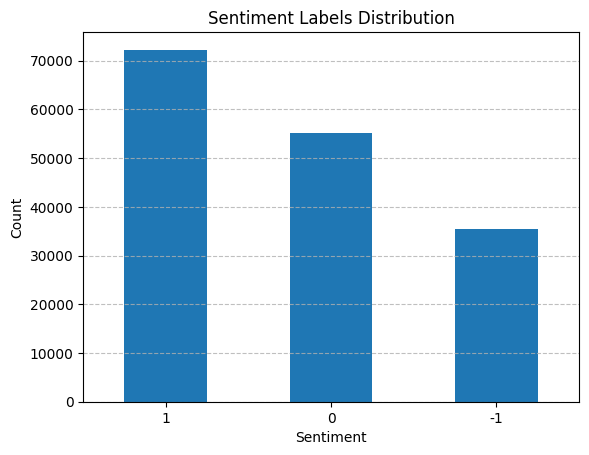

In [ ]:
import matplotlib.pyplot as plt

count = df_cleaned["category"].value_counts()

plt.title("Sentiment Labels Distribution")

count.plot(kind="bar")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)

plt.ylabel("Count")

plt.grid(axis="y", linestyle="--", alpha=0.8)  # horizontal lines

plt.show()

From this bar graph, we can see that there is a noticeable difference between the three classes. The positive class (1) has over 70,000, the neutral class (0) has around 55,000, and the negative class (-1) has around 30,000.

This imbalance indicates that we must use stratified splitting in the later section.


# **5 Dataset Splitting**

Before being able to use the dataset, we need to partition it into three sets:

1. **Training** - used to train the model to learn and change its parameters
2. **Validation** - used to evaluate the model, comparing its predictions to correct answers for hyperparameter tuning
3. **Test** - used to test the model with new, unseen data

The following section will be dedicated solely to splitting the dataset.

## **Splitting the dataset into Training and Testing**


# **references**

Bird, S., & Loper, E. (2004, July). NLTK: The natural language toolkit. _Proceedings of the ACL Interactive Poster and Demonstration Sessions_, 214–217. https://aclanthology.org/P04-3031/

El-Demerdash, A. A., Hussein, S. E., & Zaki, J. F. W. (2021). Course evaluation based on deep learning and SSA hyperparameters optimization. _Computers, Materials & Continua, 71_(1), 941–959. https://doi.org/10.32604/cmc.2022.021839

George, M., & Murugesan, R. (2024). Improving sentiment analysis of financial news headlines using hybrid Word2Vec-TFIDF feature extraction technique. _Procedia Computer Science, 244_, 1–8.

Hussein, S. (2021). _Twitter sentiments dataset_. Mendeley.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. _Journal of Machine Learning Research, 12_, 2825–2830.

Rani, D., Kumar, R., & Chauhan, N. (2022, October). Study and comparison of vectorization techniques used in text classification. In _2022 13th International Conference on Computing Communication and Networking Technologies (ICCCNT)_ (pp. 1–6). IEEE.

Wolfram Research. (2015). _DeleteStopwords_. https://reference.wolfram.com/language/ref/DeleteStopwords.html


# **appendix: `clean` wrapper function definition**

Below is the definition of the `clean` wrapper function that encapsulates all internal functions used in the cleaning pipeline.


In [39]:
clean??

# **appendix: `find_spam_and_empty` wrapper function definition**

Below is the definition of the `find_spam_and_empty` wrapper function that encapsulates all internal functions for the spam detection algorithm.


In [40]:
find_spam_and_empty??

# **appendix: comparison of traditional vectorization techniques**

Traditional vectorization techniques include BoW and Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF weights each word based on its frequency in a document and its rarity across the corpus, reducing the impact of common words. BoW, in contrast, simply counts word occurrences without considering corpus-level frequency. In this project, BoW was chosen because stopwords were already removed during preprocessing, and the dataset is domain-specific <u>(Rani et al., 2022)</u>. In such datasets, frequent words are often meaningful domain keywords, so scaling them down (as TF-IDF would) could reduce the importance of these key terms in the feature representation.


# **appendix: `BagOfWordsModel` class definition**

Below is the definition of the `BagOfWordsModel` class that encapsulates the desired parameters.


In [41]:
BagOfWordsModel??